
Original DataFrame :

   Student  Semester  Marks   Age  Height  Study_Hours
0     Lisa         1   78.0   NaN   169.0          5.0
1    Jisoo         1    NaN  17.0   180.0          4.0
2     Rose         2   89.0  18.0     NaN          6.0
3   Jennie         2   85.0  19.0   176.0          7.0
4     Ruby         3   77.0   NaN     NaN          4.0
5    Jimin         3   90.0  22.0   161.0          7.0
6   Rosiee         4    NaN  19.0   183.0          5.0
7    Alora         4   56.0  21.0   156.0          NaN
8     Sidd         5   86.0  18.0   195.0          7.0
9   Khushi         5   55.0   NaN   166.0          8.0
10  Jamice         6   89.0  17.0   150.0          6.0
11    Alia         6   70.0  20.0   168.0          NaN

DataFrame after filling Null values:

   Student  Semester  Marks   Age  Height  Study_Hours
0     Lisa         1   78.0  19.0   169.0          5.0
1    Jisoo         1   77.5  17.0   180.0          4.0
2     Rose         2   89.0  18.0   170.4          6.0
3  

C:\Users\Sambhawi Pandey\AppData\Local\Temp\ipykernel_18408\1237395129.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Marks"].fillna(df["Marks"].mean(), inplace=True)
C:\Users\Sambhawi Pandey\AppData\Local\Temp\ipykernel_18408\1237395129.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

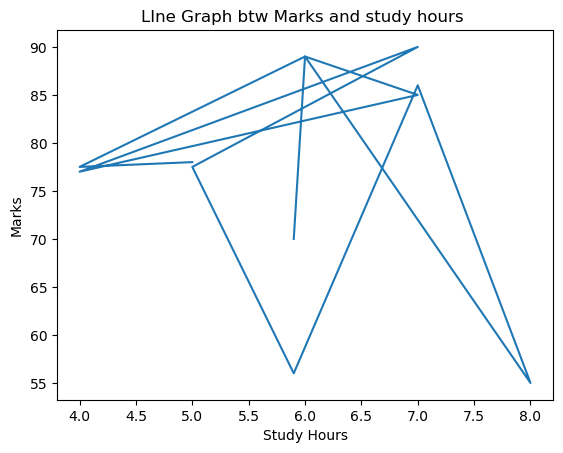

the Correlation btw marks and study hours is : -0.08030759328621188


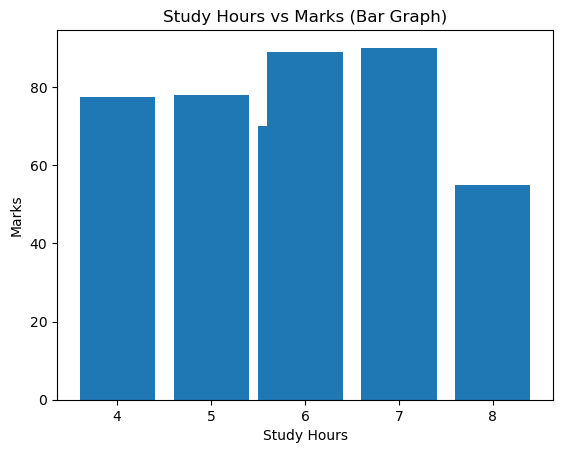


IQR Outliers:
   Student  Semester  Marks   Age  Height  Study_Hours
7   Alora         4   56.0  21.0   156.0          5.9
9  Khushi         5   55.0  19.0   166.0          8.0

Z-score Outliers:
 Empty DataFrame
Columns: [Student, Semester, Marks, Age, Height, Study_Hours, Z_score_Marks]
Index: []


In [18]:
#Ques 2 create a data set using dictionary which includes student name , sem , age , height , study hrs. Also include some null values 
# i) value count of student in first year
# ii) outlier in mark column
# iii) correlation in marks and study hrs
# iv) line graph between study hrs and marks

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


data = {
    "Student": ["Lisa","Jisoo","Rose","Jennie","Ruby","Jimin","Rosiee","Alora","Sidd","Khushi","Jamice","Alia"],
    "Semester": [1,1,2,2,3,3,4,4,5,5,6,6],
    "Marks": [78,np.nan,89,85,77,90,np.nan,56,86,55,89,70],
    "Age": [np.nan,17,18,19,np.nan,22,19,21,18,np.nan,17,20],
    "Height": [169,180,np.nan,176,np.nan,161,183,156,195,166,150,168],
    "Study_Hours": [5,4,6,7,4,7,5,np.nan,7,8,6,np.nan]
}

df = pd.DataFrame(data)
print("\nOriginal DataFrame :\n")
print(df)

df["Marks"].fillna(df["Marks"].mean(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Height"].fillna(df["Height"].mean(), inplace=True)
df["Study_Hours"].fillna(df["Study_Hours"].mean(),inplace=True)

print("\nDataFrame after filling Null values:\n")
print(df)

plt.plot(df["Study_Hours"], df["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("LIne Graph btw Marks and study hours ")
plt.show()

correlation = df["Marks"].corr(df["Study_Hours"])
print("the Correlation btw marks and study hours is " \
"" \
"" \
":", correlation)

plt.figure()
plt.bar(df["Study_Hours"], df["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks (Bar Graph)")
plt.show()



Q1 = df["Marks"].quantile(0.25)
Q3 = df["Marks"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df["Marks"] < lower_bound) | (df["Marks"] > upper_bound)]
print("\nIQR Outliers:\n", iqr_outliers)

df["Z_score_Marks"] = stats.zscore(df["Marks"])
zscore_outliers = df[df["Z_score_Marks"].abs() > 3]
print("\nZ-score Outliers:\n", zscore_outliers)